# Problem 1

1. Fix s = 1 and let ε ∼ N (0, s^2 ·I_n ). 
2. Determine E[ ||ε|| ] as a function of s^2 and n. 

You can do this however you like (besides looking it up): analytically by deriving the answer, or estimating numerically using a computer for various values of the variables and plotting the result as a heatmap or multiple line plots. 

Indeed, I encourage you to try both, even if you already know the answer. In the numerical case, think about the confidence interval of your computation and try to justify how certain you are of the answer for each n.

### Imports And Global Constants

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

N_SAMPLES=10000

### Import utility module

In [2]:
import sci_kit_learn_utils.utils as scu

### Calculate Distance - Store as tuple(dimension,variance,distance)

In [35]:
#  Look at dimensions between 2 and 10
dimension=list(range(2,11))
deviation_list=np.linspace(0,2,num=21,endpoint=True)[1:]
list_of_tuples=list()

#  Container for all the dimensions
dim_d=dict()

for d in dimension:
    #  Container for expectation of N_SAMPLES for single variance
    ex_d=dict()
    for s in deviation_list:
        #  Draw N_SAMPLES
        d_list=[scu.dist_to_origin(scu.draw_normal_sample(d,s), d) for i in range(N_SAMPLES)]
        ex_d[s]=abs(np.sum(d_list)/float(N_SAMPLES))
    dim_d[d] = ex_d
    
for dk, dv in dim_d.items():
    print(f'DIMENSION : {dk}')
    for k,v in dv.items():
        print(f'  Var: {k**2:0.3f} Dist: {v:0.4f}')
        list_of_tuples.append((dk,float(f'{k**2:0.3f}'),v))

DIMENSION : 2
  Var: 0.010 Dist: 0.1876
  Var: 0.040 Dist: 0.3755
  Var: 0.090 Dist: 0.5664
  Var: 0.160 Dist: 0.7503
  Var: 0.250 Dist: 0.9438
  Var: 0.360 Dist: 1.1302
  Var: 0.490 Dist: 1.3127
  Var: 0.640 Dist: 1.5007
  Var: 0.810 Dist: 1.6976
  Var: 1.000 Dist: 1.8804
  Var: 1.210 Dist: 2.0705
  Var: 1.440 Dist: 2.2596
  Var: 1.690 Dist: 2.4417
  Var: 1.960 Dist: 2.6294
  Var: 2.250 Dist: 2.8172
  Var: 2.560 Dist: 3.0147
  Var: 2.890 Dist: 3.1904
  Var: 3.240 Dist: 3.3825
  Var: 3.610 Dist: 3.5669
  Var: 4.000 Dist: 3.7393
DIMENSION : 3
  Var: 0.010 Dist: 0.2928
  Var: 0.040 Dist: 0.5828
  Var: 0.090 Dist: 0.8753
  Var: 0.160 Dist: 1.1700
  Var: 0.250 Dist: 1.4596
  Var: 0.360 Dist: 1.7568
  Var: 0.490 Dist: 2.0448
  Var: 0.640 Dist: 2.3302
  Var: 0.810 Dist: 2.6240
  Var: 1.000 Dist: 2.9108
  Var: 1.210 Dist: 3.2033
  Var: 1.440 Dist: 3.4967
  Var: 1.690 Dist: 3.8165
  Var: 1.960 Dist: 4.0772
  Var: 2.250 Dist: 4.3673
  Var: 2.560 Dist: 4.6694
  Var: 2.890 Dist: 4.9644
  Var: 3.2

### Convert Tuple to Pandas DataFrame

In [36]:
df = pd.DataFrame(list_of_tuples, columns =['dimension', 'variance', 'distance'])

### Plot DataFrame as HeatMap in Seaborn

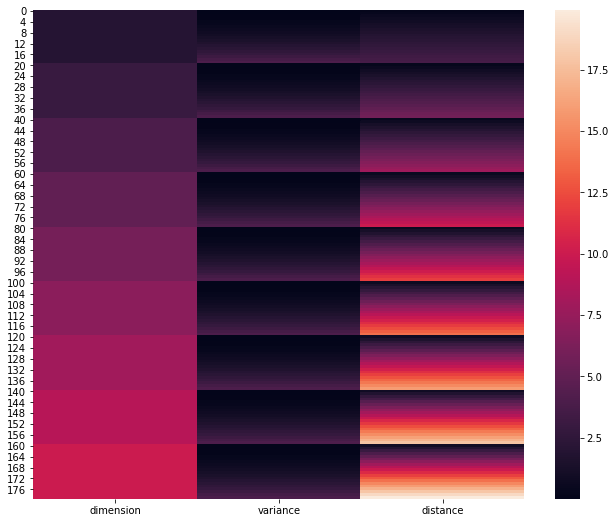

In [37]:
fig, ax = plt.subplots(figsize=(11, 9))
#sb.heatmap(df.loc[df['dimension'] == 2])
sb.heatmap(df)
plt.show()

### Discussion
1. When variance is high, distance is high regardless of dimension
1. Best scenario is 0 variance (perfect measurement of data)
1. Increasing dimension reduces the range of acceptable variance
    1. Low dimension at top of HeatMap, all values of distance are "low"
    1. Middle dimension, high variance distances are larger
    1. High dimension, high variance, distances are largest
    1. For 0 variance and "low" variance - distances are close to origin: black

### Office Hours
#### T 2021-03-02

First meeting with Dr. Giusti.  Pointers for this problem
1. Make line plot
    1. For given variance, plot dimension vs mean distance
    1. Put several variance plots on same plot
    1. Claim is that the shape is recognizable
    1. Places where the plots cross should inform exercise 2

     dimension  distance
2            2  0.566401
22           3  0.875302
42           4  1.183115
62           5  1.484566
82           6  1.788443
102          7  2.089300
122          8  2.390756
142          9  2.693714
162         10  2.998515


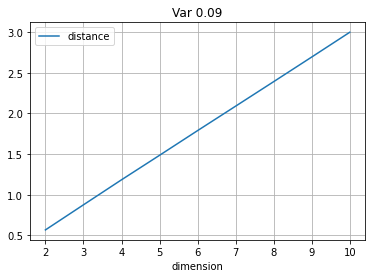

In [52]:
var_list=[float(f'{i**2:0.3f}') for i in deviation_list]
dim_v_dist_df=df.loc[df['variance'] == float(f'{var_list[2]:0.3f}')][['dimension','distance']]
params={'title': f'Var {var_list[2]}','grid':True}
dim_v_dist_df.set_index('dimension').plot(**params)
print(dim_v_dist_df)